<h1><b>Music Genre Classification</b><h1>

In [85]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import librosa
import librosa.display
import IPython.display as ipd


<h3>Genres from the Dataset</h3>

In [86]:
#Displaying the list of Genres
import os
general_path = 'Data'
print(list(os.listdir(f'genres_original')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


<h3>Defining the features</h3>

In [87]:
audio_path = f'genres_original/jazz/jazz.00055.wav'
y, sr = librosa.load(audio_path)
print ('y:',y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print ('length: ', np.shape(y) [0] /sr)

y: [-0.04998779 -0.04193115 -0.02993774 ... -0.01553345 -0.01965332
 -0.02023315] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

length:  30.013333333333332


In [88]:
ipd.Audio(audio_path)

<h3> Visualizations</h3>
<h5>WavePlot for Various Genres</h5>

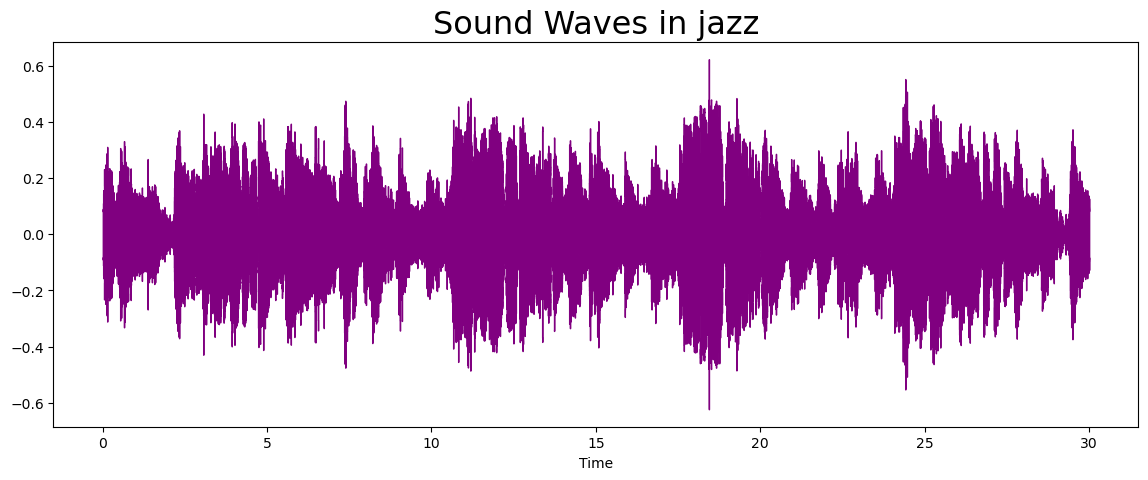

In [89]:
#Visualizing genres using waveplot by taking a sample
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, color = 'purple')
plt.title("Sound Waves in jazz", fontsize = 23);

<h3>Spectogram</h3>

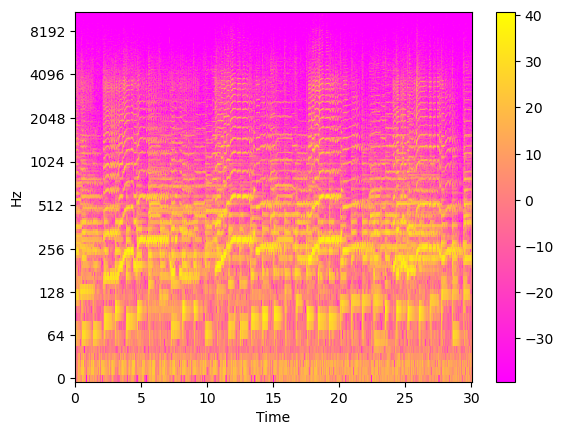

In [90]:
Ydb = librosa.amplitude_to_db(Y)
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='log', cmap = 'spring')
plt.colorbar()

<h5>Zero-crossing rate</h5>
The zero-crossing rate (ZCR) is the rate at which a signal changes from positive to zero to negative or from negative to zero to positive. Its value has been widely used in both speech recognition and music information retrieval, being a key feature to classify percussive sounds.

In [91]:
zero_crossings = librosa.zero_crossings(y, pad=False)

print(sum(zero_crossings))

25040


<h5>Mel-Frequency Cepstral Coefficients</h5>
The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) that concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

(20, 1293)
[-248.05203 -224.46487 -214.49811 ... -307.1035  -304.1544  -289.7091 ]


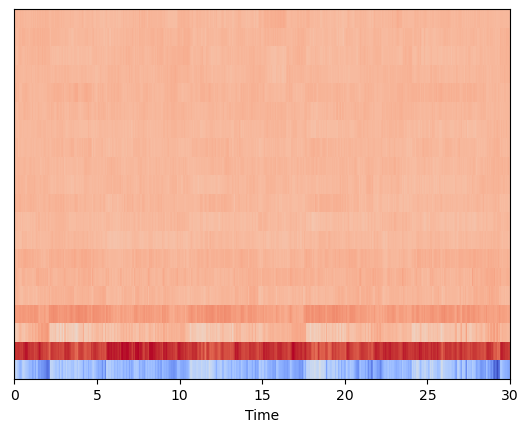

In [92]:
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print(mfccs.shape)
print(mfccs[0])
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:266: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Mean: -1.4751342e-09 

Var: 1.0


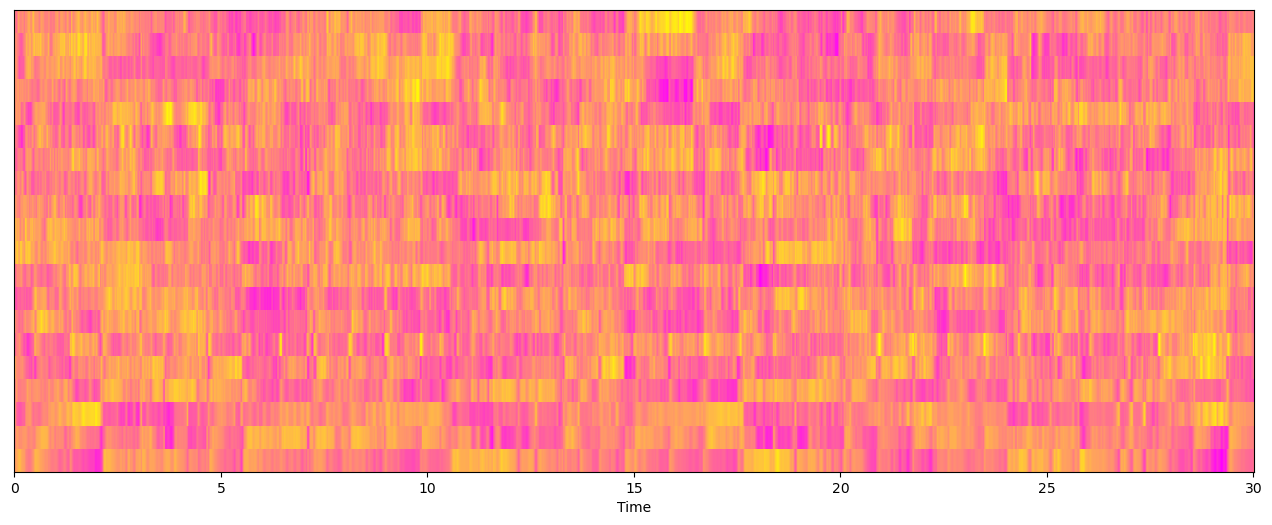

In [93]:
#We can also perform feature scaling such that each coefficient dimension has zero mean and unit variance:
import sklearn.preprocessing 
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'spring');

<h4>Harmonics and Perceptrual</h4>

[]

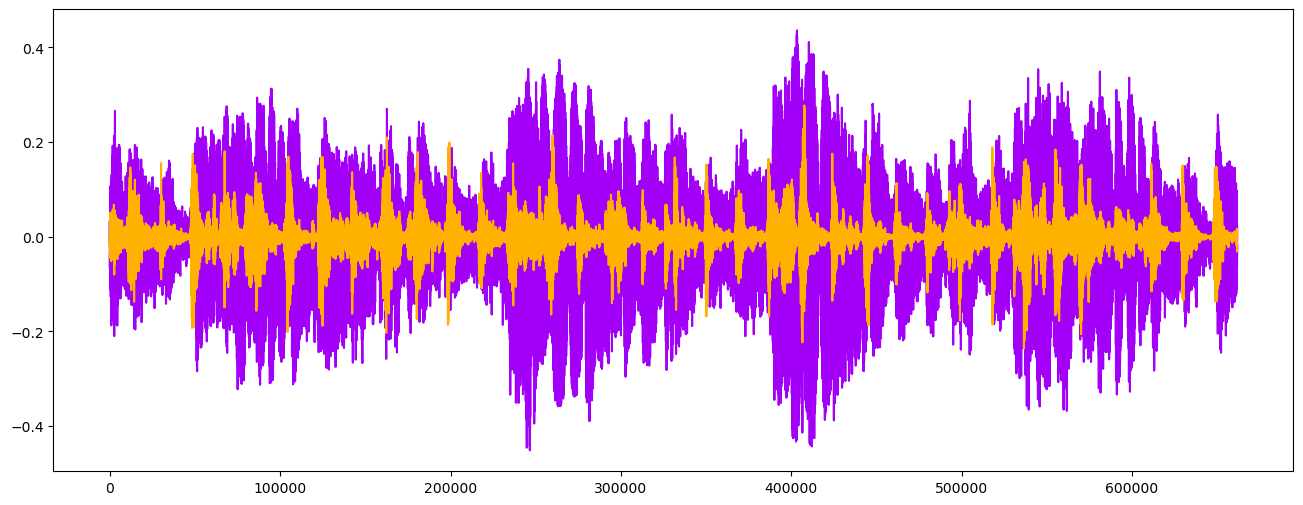

In [94]:
y_harm, y_perc = librosa.effects.hpss(y)
plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');
plt.plot(x_axis='time', y_axis='amplitude')

<h3> Reading the Dataset</h3>

In [95]:
data = pd.read_csv(f'features_30_sec.csv')
data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


<h4>Correlation Heatmap and Tempo ratios</h4>

<Axes: >

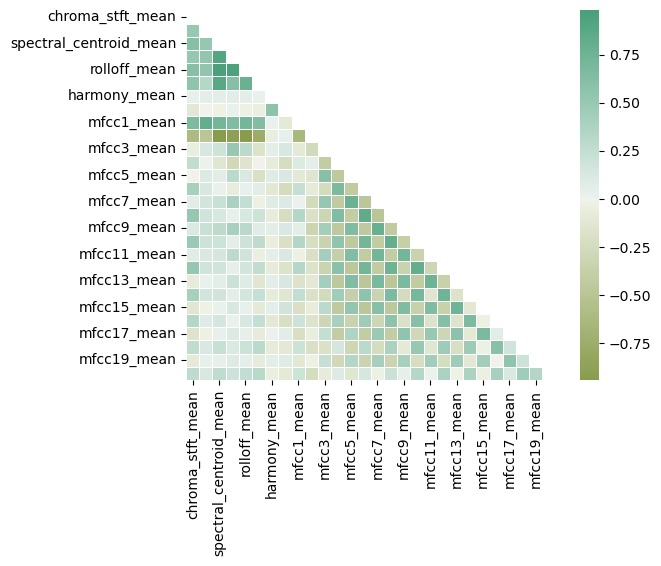

In [96]:
spike_cols = [col for col in data.columns if 'mean' in col]
corr_matrix = data[spike_cols].corr()
upper_triangle = np.triu(np.ones_like(corr_matrix, dtype=np.bool_))
f, ax = plt.subplots()
cmap = sns.diverging_palette(100, 150, l = 60, as_cmap = True, n = 5)
sns.heatmap(corr_matrix, cmap = cmap, mask = upper_triangle, center = 0, square = True, linewidths = 0.5)

Text(0, 0.5, 'Tempo')

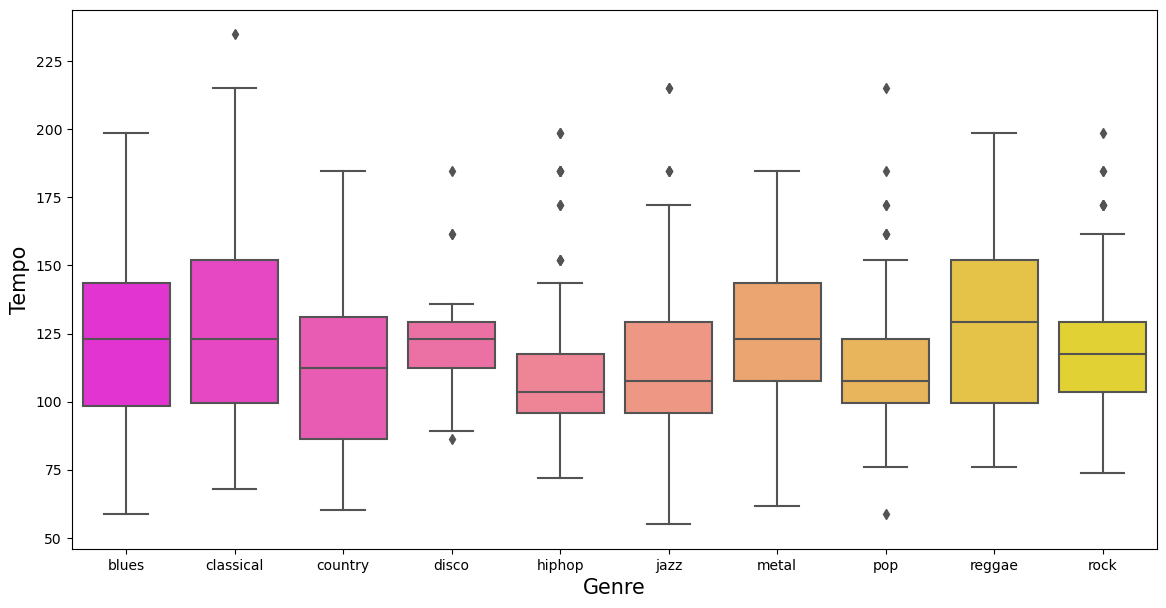

In [97]:
x = data [['label', 'tempo']]
f, ax = plt.subplots(figsize = (14, 7))
sns.boxplot(x = 'label', y = 'tempo', data = x, palette = 'spring')
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Tempo', fontsize = 15)

<h4>Normalization and PCA</h4>

In [98]:
def split (data):
    data = data.iloc[0:,1:]

    y = data['label']
    X = data.loc[:, data.columns != 'label']
    return X, y
X, y = split (data)

In [99]:
from sklearn import preprocessing

#Normalization
def Normalize(X) -> X:
    min_max_scaler = preprocessing.MinMaxScaler()
    X = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X.columns)
    return X
X = Normalize(X)

In [100]:
#PCA

from sklearn.decomposition import PCA
def pca_calc(X, y):
    pca = PCA(n_components = 2)

    key_components = pca.fit_transform(X)
    keyDf = pd.DataFrame (data = key_components, columns = ['key_comp1','key_comp2'])
    final = pd.concat([keyDf, y], axis = 1)
    return final
final = pca_calc(X, y)

<Axes: xlabel='key_comp1', ylabel='key_comp2'>

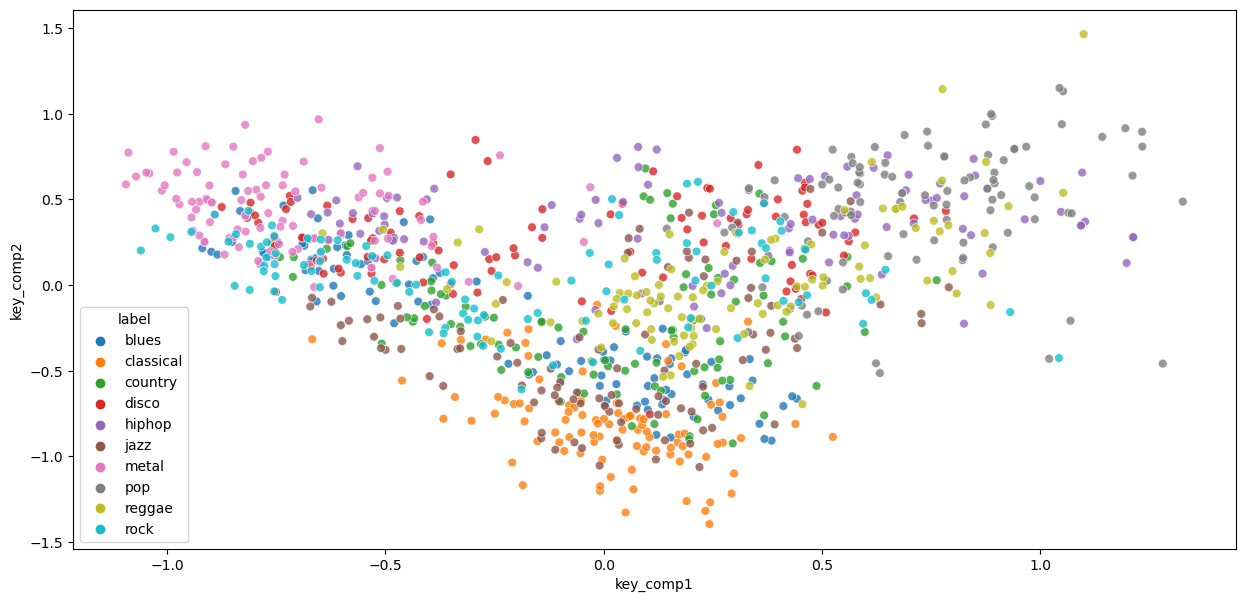

In [101]:
plt.figure(figsize = (15, 7))
sns.scatterplot(x = 'key_comp1', y = 'key_comp2', data = final, hue = 'label', alpha = 0.8, s = 40)

<h4>Accuracy of different algorithms for the model</h4>

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [103]:
data = pd.read_csv(f'features_3_sec.csv')

In [104]:
enc = LabelEncoder()
enc.fit(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])

data ['label' ] = enc.transform(data['label'])
X, y = split (data)
X = Normalize(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, random_state= 42)

In [106]:
import time
accuracy_and_time = {}
def model (model, title):
    start = time.time()
    model.fit (X_train, y_train)
    preds = model.predict(X_test)
    end = time.time()
    accuracy_and_time[title] = [round(accuracy_score(y_test,preds), 5), (end - start)]

In [107]:
#Naive Bayes
nb = GaussianNB()
model(nb, "NaiveBayes")

#StochasticGradient
sg = SGDClassifier()
model(sg, "StochasticGradient")

#LogisticRegression
lg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=5000, multi_class= 'multinomial', penalty= 'l2', )
model(lg, "LogisticRegression")

#DecisionTreeClassifier
dt = DecisionTreeClassifier()
model(dt, "DecisionTreeClassifier")

#SVC
svc = SVC()
model(svc, "Support Machine Vector")

#Random Forest
rf = RandomForestClassifier()
model(rf, "RandomForestClassifier")

In [108]:
pd.DataFrame.from_dict(accuracy_and_time, orient = 'index', columns = ['accuracy', 'time elapsed'])

,accuracy,time elapsed
NaiveBayes,0.51952,0.156240
StochasticGradient,0.65866,1.770748
LogisticRegression,0.69570,4.195896
DecisionTreeClassifier,0.64598,6.017484
Support Machine Vector,0.75409,18.601044
RandomForestClassifier,0.86220,48.414324


<h4> Algorithm Tuning and Feature Importance</h4>

In [109]:
data = pd.read_csv(f"features_30_sec.csv")
X, y = split (data)
X = Normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [110]:
from sklearn.model_selection import GridSearchCV
def tuning(X_train, y_train):
    params = {
        'n_neighbors':  range(1, 40),
        'p': [1,2],
        'weights': ['uniform', 'distance']
    }

    clf = GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid=params,
        cv=5,
        n_jobs=5,
        verbose=1,
    )

    clf.fit(X_train, y_train)
    best = clf.best_params_
    print('Best parameters: ', best)
    n_neighbors = best['n_neighbors']
    p = best['p']
    weights = best ['weights']
    return n_neighbors, p, weights
n_neighbors, p, weights = tuning(X_train, y_train)

Fitting 5 folds for each of 156 candidates, totalling 780 fits
Best parameters:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.66              nan 0.66142857        nan 0.66
        nan 0.66142857        nan 0.68714286        nan 0.67428571
        nan 0.69285714        nan 0.67142857        nan 0.69428571
        nan 0.66428571        nan 0.68285714        nan 0.66714286
        nan 0.68857143        nan 0.66428571        nan 0.68142857
        nan 0.66714286        nan 0.66571429        nan 0.65714286
        nan 0.67285714        nan 0.66285714        nan 0.66285714
        nan 0.66              nan 0.66714286        nan 0.66285714
        nan 0.66571429        nan 0.65              nan 0.65857143
        nan 0.64142857        nan 0.66428571        nan 0.63428571
        nan 0.66142857        nan 0.63571429        nan 0.65571429
        nan 0.62857143        nan 0.66142857        nan 0.62142857
        nan 0.65142857        nan 0.62571429        nan 0.65

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= n_neighbors, weights= weights, p = p)
knn.fit (X_train, y_train)
y_pred = knn.predict (X_test)
print( "KNN accuracy: ", round(accuracy_score(y_test,y_pred), 5))

KNN accuracy:  0.68


<Axes: >

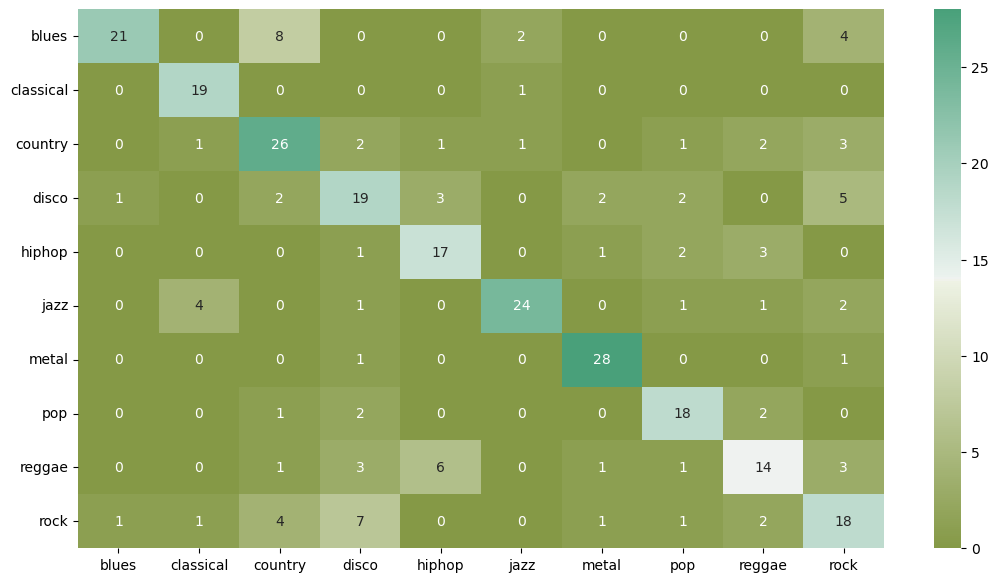

In [112]:
conf = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (13, 7))
sns.heatmap(conf, cmap= cmap, annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])

<h3>Genre Classification</h3>

In [113]:
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Read data
data = pd.read_csv(f'features_30_sec.csv')
data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [114]:
import os
import numpy as np
import pandas as pd
import librosa
from scipy.io import wavfile

def loading_new_audio(audio_path, filename, data):
    columns = list(data.columns.values)

    y, sr = librosa.load(os.path.join(audio_path, filename))
    y, _ = librosa.effects.trim(y)

    Y = np.abs(librosa.stft(y))
    Ydb = librosa.amplitude_to_db(Y)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr).T
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).T
    zero_crossings = librosa.zero_crossings(y, pad=False)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
    harmony, perceptr = librosa.effects.hpss(y)
    rms = librosa.feature.rms(y=y)
    spectral_bandwith = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    length = len(y)

    chroma_stft_mean = np.mean(chromagram)
    chroma_stft_var = np.var(chromagram)

    rms_mean = np.mean(rms)
    rms_var = np.var(rms)

    spectral_centroid_mean = np.mean(spectral_centroids)
    spectral_centroid_var = np.var(spectral_centroids)

    spectral_bandwith_mean = np.mean(spectral_bandwith)
    spectral_bandwith_var = np.var(spectral_bandwith)

    rolloff_mean = np.mean(spectral_rolloff)
    rolloff_var = np.var(spectral_rolloff)

    zero_crossing_rate_mean = np.mean(zero_crossings)
    zero_crossing_rate_var = np.var(zero_crossings)

    harmony_mean = np.mean(harmony)
    harmony_var = np.var(harmony)

    perceptr_mean = np.mean(perceptr)
    perceptr_var = np.mean(perceptr)

    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    label = None

    data_ = [filename, length, chroma_stft_mean, chroma_stft_var, rms_mean, rms_var, spectral_centroid_mean, spectral_centroid_var, spectral_bandwith_mean, spectral_bandwith_var, 
             rolloff_mean, rolloff_var, zero_crossing_rate_mean, zero_crossing_rate_var, harmony_mean, harmony_var, perceptr_mean, perceptr_var, tempo]

    for i in range(20):
        data_.append(np.mean(mfccs[i]))
        data_.append(np.var(mfccs[i]))

    data_.append(label)
    data_ = [data_]
    data_ = pd.DataFrame(data_, columns=columns)

    return data_

In [115]:
audio_path = 'new_input'
file_name = 'Love You Like The Movies.mp3'
data_ = loading_new_audio(audio_path, file_name, data)
data_

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,Love You Like The Movies.mp3,5005824,0.33715,0.093782,0.219075,0.014978,2716.843187,984541.666689,2651.485956,212666.585765,...,94.188202,-8.556901,97.951759,2.360191,84.252029,-3.711385,96.906395,-0.533955,94.014191,None


In [116]:
X, y= split(data)
X = X.drop(columns=['length'])
X

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,1.222421e+06,...,1.789867,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665
996,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,1.046621e+06,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,8.042154e+05,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,1.332712e+06,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088


In [117]:
X_new, y_new = split (data_)
X_new = X_new.drop(columns = ['length'])
X_new

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.33715,0.093782,0.219075,0.014978,2716.843187,984541.666689,2651.485956,212666.585765,5766.590916,3.184396e+06,...,-1.394081,94.188202,-8.556901,97.951759,2.360191,84.252029,-3.711385,96.906395,-0.533955,94.014191


In [118]:
X_ = pd.concat ([X, X_new], ignore_index= True)
X_

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,1.046621e+06,...,3.739020,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624
997,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,8.042154e+05,...,1.838090,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515
998,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,3015.631004,1.332712e+06,...,-2.812176,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088
999,0.358401,0.085884,0.054454,0.000336,1609.795082,422203.216152,1797.213044,120115.632927,3246.908930,1.753476e+06,...,1.794104,59.167755,-7.069775,73.760391,0.028346,76.504326,-2.025783,72.189316,1.155239,49.662510


In [119]:
X_ = Normalize(X_)
X_new = X_.iloc[-1]
X_ = X_.drop([1000])
X_

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.362279,0.695468,0.318188,0.101983,0.314117,0.040233,0.422879,0.109789,0.385532,0.102567,...,0.564186,0.112704,0.541287,0.057615,0.422444,0.082450,0.487950,0.109503,0.599189,0.078255
1,0.343622,0.793392,0.230894,0.085580,0.248405,0.121475,0.436889,0.296867,0.353329,0.342717,...,0.570198,0.120353,0.574685,0.118286,0.448184,0.102997,0.548800,0.099081,0.579640,0.075947
2,0.389832,0.640692,0.433652,0.099064,0.254261,0.049046,0.325334,0.095712,0.289224,0.088981,...,0.622467,0.081898,0.331003,0.085962,0.370988,0.116420,0.453724,0.087317,0.501381,0.045405
3,0.473508,0.777954,0.345856,0.229160,0.129376,0.058253,0.267404,0.227566,0.181068,0.171001,...,0.565151,0.091876,0.484549,0.092509,0.460684,0.068975,0.538690,0.062612,0.468060,0.048168
4,0.277759,0.681062,0.219641,0.083075,0.327270,0.110761,0.325514,0.113536,0.357017,0.180228,...,0.383289,0.200462,0.410225,0.156424,0.403875,0.120300,0.424652,0.130173,0.233047,0.094836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.366294,0.565355,0.188974,0.012317,0.372066,0.090548,0.462737,0.113776,0.442001,0.139684,...,0.599764,0.093498,0.137363,0.070955,0.528217,0.067274,0.355114,0.108986,0.530772,0.084307
996,0.461109,0.480368,0.181264,0.021099,0.371728,0.057513,0.448340,0.104735,0.428856,0.119351,...,0.666628,0.064317,0.222386,0.064937,0.506174,0.052253,0.332575,0.067713,0.485401,0.047815
997,0.529141,0.483246,0.194487,0.011492,0.390015,0.073870,0.394101,0.093465,0.413981,0.091315,...,0.601418,0.063653,0.152848,0.057215,0.563199,0.064824,0.178146,0.076420,0.504920,0.043984
998,0.387488,0.738721,0.200112,0.043603,0.214389,0.076729,0.352424,0.143718,0.285865,0.152440,...,0.441895,0.096819,0.446369,0.075619,0.494291,0.059564,0.405462,0.088864,0.462871,0.066938


In [120]:
X_train, X_test, y_train, y_test = train_test_split (X_, y, test_size= 0.3, random_state= 42)

In [121]:
n_neighbors, p, weights = tuning(X_train, y_train)

Fitting 5 folds for each of 156 candidates, totalling 780 fits
Best parameters:  {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.66428571        nan 0.65857143        nan 0.66428571
        nan 0.65857143        nan 0.68571429        nan 0.66714286
        nan 0.69428571        nan 0.67857143        nan 0.69142857
        nan 0.66571429        nan 0.68142857        nan 0.67
        nan 0.68285714        nan 0.67428571        nan 0.67571429
        nan 0.67428571        nan 0.66428571        nan 0.65
        nan 0.67714286        nan 0.67              nan 0.66714286
        nan 0.66285714        nan 0.67714286        nan 0.65857143
        nan 0.68285714        nan 0.65428571        nan 0.66857143
        nan 0.64285714        nan 0.66142857        nan 0.63714286
        nan 0.66571429        nan 0.63285714        nan 0.66
        nan 0.62857143        nan 0.66428571        nan 0.61857143
        nan 0.65857143        nan 0.61571429        nan 0.66857143
     

In [122]:
knn = KNeighborsClassifier(n_neighbors= n_neighbors, p = p, weights= weights)
knn.fit (X_train.values, y_train.values)
y_pred = knn.predict (X_test.values)
print( "KNN accuracy: ", round(accuracy_score(y_test,y_pred), 5))

KNN accuracy:  0.69333


In [123]:
#genre prediction
def genre_prediction(X_new):
        label_predicted = knn.predict_proba([X_new]).reshape(-1)
        indicies = np.argsort(label_predicted)[::-1]
        genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
        for index in indicies:
                print("Genre probability {genre}: {probability}".format(genre=genres[index], probability=label_predicted[index]))
        y_new = knn.predict([X_new])
        print (f"Genre for '{file_name}':", y_new)
genre_prediction(X_new)

Genre probability reggae: 0.5051877699277932
Genre probability hiphop: 0.4948122300722068
Genre probability rock: 0.0
Genre probability pop: 0.0
Genre probability metal: 0.0
Genre probability jazz: 0.0
Genre probability disco: 0.0
Genre probability country: 0.0
Genre probability classical: 0.0
Genre probability blues: 0.0
Genre for 'Love You Like The Movies.mp3': ['reggae']
